In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier, plot_importance
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import mutual_info_classif, f_classif
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import accuracy_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn.ensemble import RandomForestClassifier


In [2]:
# Read the csv file
df = pd.read_csv("data.csv")
X = df.iloc[:,2:]
Y = df.iloc[:,1]
df.head()

,sample index,class_label,sensor0,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9
0,sample0,1.0,0.834251,0.726081,0.535904,0.214896,0.873788,0.767605,0.111308,0.557526,0.599650,0.665569
1,sample1,1.0,0.804059,0.253135,0.869867,0.334285,0.604075,0.494045,0.833575,0.194190,0.014966,0.802918
2,sample2,1.0,0.694404,0.595777,0.581294,0.799003,0.762857,0.651393,0.075905,0.007186,0.659633,0.831009
3,sample3,1.0,0.783690,0.038780,0.285043,0.627305,0.800620,0.486340,0.827723,0.339807,0.731343,0.892359
4,sample4,1.0,0.788835,0.174433,0.348770,0.938244,0.692065,0.377620,0.183760,0.616805,0.492899,0.930969


In [3]:
headers = list(df.columns[2:])
print(headers)

['sensor0', 'sensor1', 'sensor2', 'sensor3', 'sensor4', 'sensor5', 'sensor6', 'sensor7', 'sensor8', 'sensor9']


In [4]:
print(X)

      sensor0   sensor1   sensor2   sensor3   sensor4   sensor5   sensor6  \
0    0.834251  0.726081  0.535904  0.214896  0.873788  0.767605  0.111308   
1    0.804059  0.253135  0.869867  0.334285  0.604075  0.494045  0.833575   
2    0.694404  0.595777  0.581294  0.799003  0.762857  0.651393  0.075905   
3    0.783690  0.038780  0.285043  0.627305  0.800620  0.486340  0.827723   
4    0.788835  0.174433  0.348770  0.938244  0.692065  0.377620  0.183760   
..        ...       ...       ...       ...       ...       ...       ...   
395  0.433150  0.816109  0.452945  0.065469  0.237093  0.719321  0.577969   
396  0.339346  0.914610  0.097827  0.077522  0.484140  0.690568  0.420054   
397  0.320118  0.444951  0.401896  0.970993  0.960264  0.138345  0.354927   
398  0.059132  0.337426  0.772847  0.099038  0.966042  0.975086  0.532891   
399  0.379778  0.460256  0.229257  0.768975  0.321882  0.118572  0.448964   

      sensor7   sensor8   sensor9  
0    0.557526  0.599650  0.665569  
1  

The first task for any classification and regression problems is to analyze the data. Finding the missing value in the data is an important aspect of feature cleaning as certain algorithms cannot work when missing values are present and even if some algorithm can handle the missing data, it may lead to inaccurate conclusions.

In [5]:
#Check any missing values
X.isnull().values.any()

False

## Exploratory data analysis
The idea is to identify the data types of each variable and know the basic stats of the variables of the dataframe

          sensor0     sensor1     sensor2     sensor3     sensor4     sensor5  \
count  400.000000  400.000000  400.000000  400.000000  400.000000  400.000000   
mean     0.523661    0.509223    0.481238    0.509752    0.497875    0.501065   
std      0.268194    0.276878    0.287584    0.297712    0.288208    0.287634   
min      0.007775    0.003865    0.004473    0.001466    0.000250    0.000425   
25%      0.299792    0.283004    0.235544    0.262697    0.249369    0.269430   
50%      0.534906    0.507583    0.460241    0.510066    0.497842    0.497108   
75%      0.751887    0.727843    0.734937    0.768975    0.743401    0.738854   
max      0.999476    0.998680    0.992963    0.995119    0.999412    0.997367   

          sensor6     sensor7     sensor8     sensor9  
count  400.000000  400.000000  400.000000  400.000000  
mean     0.490480    0.482372    0.482822    0.541933  
std      0.289954    0.282714    0.296180    0.272490  
min      0.000173    0.003322    0.003165    0

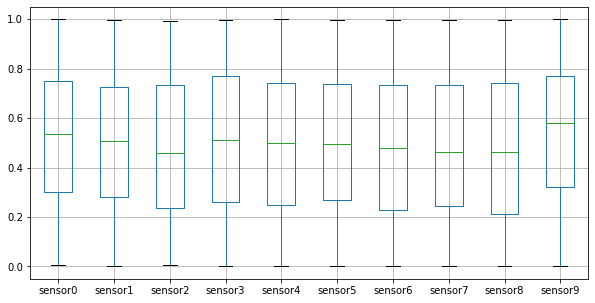

In [6]:
print(X.describe())
X.boxplot(figsize=(10, 5))


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5f8c41d908>,
      dtype=object)

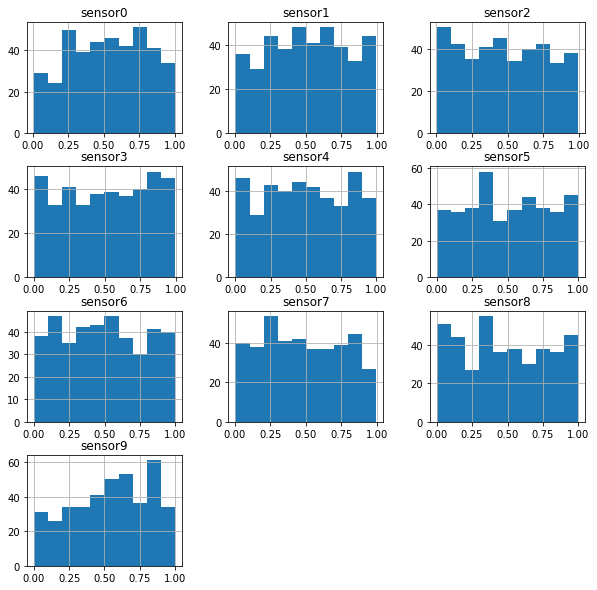

In [7]:
X.hist(figsize=(10, 10))

Feature selection is one of the vital concept in machine learning which hugely impacts the performance of the model. It is  a process to automatically or manually select those features that has a major contribution on the predicition.
It is not necessary that more data would result in highly good predictions, sometimes irrelevant and redundant features can make the learning process  more complex and may result in overfitting.
The stated problem is a classification problem where the focus is on selecting the important feature that are most useful for predictive modeling problems. Feature selection is important for few reasons.
1. Enhance the generalization capability of the model by reducing overfitting.
2. Drastically reduces the training time with lesser computation cost.
3. Increases model accuracy by making the algorithms simpler.

There are several methods available for feature selection such as:
1. Filter Methods
2. Wrapper Methods 
2. Embedded Methods

# Filter Method
## Variance Method
checking features that show the same value for the majority of the observations.


In [8]:
#Find the constant column
vs_constant = VarianceThreshold(threshold=0)
vs_constant.fit(X)
constant_columns = [column for column in X.columns
                    if column not in X.columns[vs_constant.get_support()]]
len(constant_columns)
print(len(X.columns[vs_constant.get_support()]))

10


There are no feature columns that have constant value.

## Correlation Method
checking features that are highly correlated to each other

In [9]:
#Find Correlation between features
correlated_features = set()
correlation_matrix = X.corr()

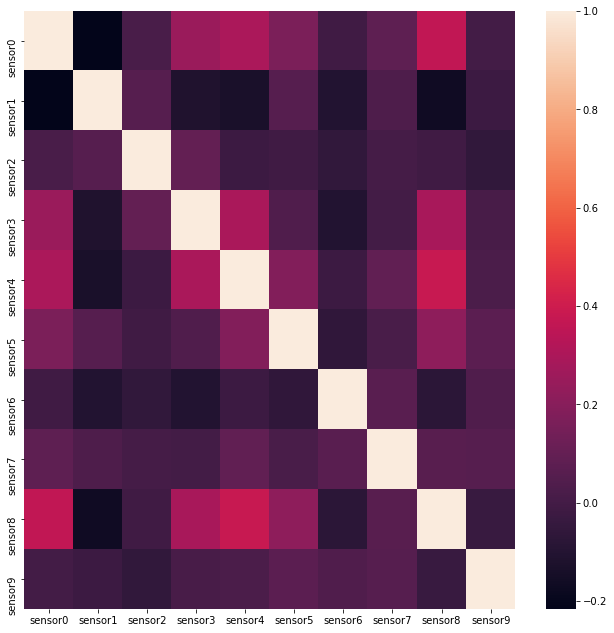

In [10]:
plt.figure(figsize=(11,11))
sns.heatmap(correlation_matrix)

In [11]:
for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
print(correlated_features)            

set()


From the correlation matrix we can note that there is no mutual dependency between the two features.

## Statistical Filter Method
These are statistical tests that measures the importance of each feature individually.
Some of the test includes-
Mutual information measures,
ANOVA measurement 

In [12]:
# applying the mutual information measurement on the data and target 
select_k = 5
selection = SelectKBest(mutual_info_classif, k=select_k).fit(X, Y)

# displaying the k best selected features.
features = X.columns[selection.get_support()]
print(features)


Index(['sensor1', 'sensor2', 'sensor4', 'sensor6', 'sensor8'], dtype='object')


In [13]:
# create the SelectKBest with the ANOVA strategy.
selection = SelectKBest(f_classif, k=select_k).fit(X, Y)
print(selection)

# display the retained features.
features = X.columns[selection.get_support()]
print(features)

SelectKBest(k=5)
Index(['sensor0', 'sensor1', 'sensor3', 'sensor4', 'sensor8'], dtype='object')


From statistical methods, we look for the common features calculated from these methods.
The important features with respect to the class labels of the samples are Sensor (1,4,8)

# Wrapper Method
The methods used are Forward Selection, Backward Elimination, and Exhaustive Selection. Random Forest classifier is used as an ML model for fitting the feature subsets evaluated from these strategies.

## Forward Selection

In [14]:

sfs1 = SFS(RandomForestClassifier(n_jobs=-1,n_estimators=5), 
           k_features=5, 
           forward=True, 
           floating=False, 
           verbose=1,
           scoring='roc_auc',
           cv=3)

sfs1 = sfs1.fit(X,Y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    4.3s finished
Features: 1/5[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    3.4s finished
Features: 2/5[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    3.0s finished
Features: 3/5[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    2.6s finished
Features: 4/5[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    2.2s finished
Features: 5/5

In [15]:
#Important features from forward selection method
selected_features_FS= X.columns[list(sfs1.k_feature_idx_)]
selected_features_FS

Index(['sensor1', 'sensor4', 'sensor6', 'sensor7', 'sensor9'], dtype='object')

## Backward Elimination Method

In [16]:
sfs2 = SFS(RandomForestClassifier(n_jobs=-1,n_estimators=5), 
           k_features=5, 
           forward=False, 
           floating=False, 
           verbose=1,
           scoring='roc_auc',
           cv=3)
sfs2 = sfs2.fit(X,Y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    3.7s finished
Features: 9/5[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    3.4s finished
Features: 8/5[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    3.0s finished
Features: 7/5[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    2.6s finished
Features: 6/5[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    2.3s finished
Features: 5/5

In [17]:
#Important features from backward elimination method
selected_feat_BE= X.columns[list(sfs2.k_feature_idx_)]
selected_feat_BE

Index(['sensor2', 'sensor3', 'sensor5', 'sensor6', 'sensor7'], dtype='object')

## Exhaustive Selection

In [18]:
efs1 = EFS(RandomForestClassifier(n_jobs=-1,n_estimators=5, random_state=0), 
           min_features=4,
           max_features=10, 
           scoring='roc_auc',
           print_progress=True,
           cv=2)

efs1 = efs1.fit(X, Y)

Features: 848/848

In [19]:
#Important features from exhaustive selection method
selected_feat_ES= X.columns[list(efs1.best_idx_)]
selected_feat_ES

Index(['sensor1', 'sensor3', 'sensor5', 'sensor6', 'sensor9'], dtype='object')

From these different methods, we found that 'sensor 6' is the only feature that is common in all the strategies we have used.
So sensor 6 is definitely an important feature for the mentioned dataset.

# Embedded Methods
Random Forests and XGBoost are used to select important features.
Random Forest is based on decision trees utilizing the bagging algorithm and the Ensemble Learning technique. It creates decision trees based on the subset of the data and combines the output and makes decisions on the majority of votes. For the mentioned dataset, Random Forest could be helpful for better interpretability of the model and it is validated by  Out of bag score which is helpful in getting the validation accuracy when the dataset is smaller in size.


In [24]:
# sort in ascending order to better visualization.
def plot_important_features(final_df, title):
    
    final_df = final_df.sort_values('Importance')

    # plot the feature importances in bars.
    final_df.columns = ['Feature', 'Importance']
    plt.figure(figsize=(10,10))
    sns.barplot(x = 'Feature' , y='Importance', data = final_df, color = 'red').set_title(title)


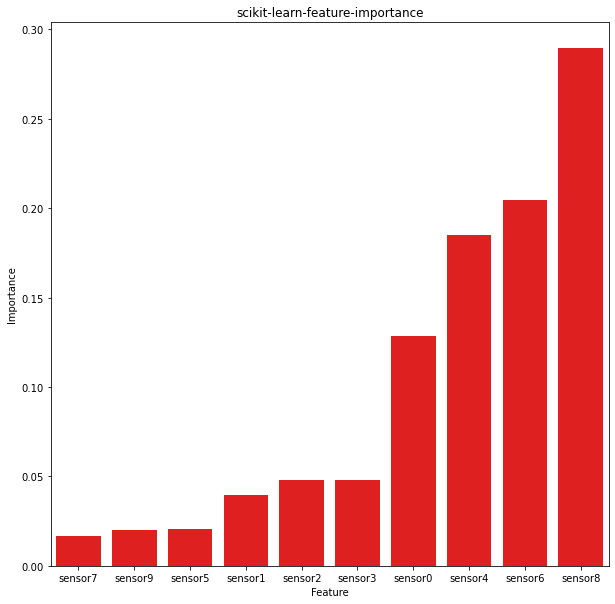

In [27]:

# create the random forest with your hyperparameters.
model = RandomForestClassifier(n_estimators=300, oob_score = True)

# fit the model to start training.
model.fit(X, Y)

# get the importance of the resulting features.
importances = model.feature_importances_
# create a data frame for visualization.
final_df = pd.DataFrame({"Feature": X.columns, "Importance":importances})
plot_important_features(final_df, 'scikit-learn-feature-importance')

In [28]:
print('Validation Score:', model.oob_score_)

Validation Score: 0.9875


The oob_score which is obtained looks quite good. 
We tried using the feature importance method of scikit learn by training Random Forest to get a prior intuition of the feature available on the dataset.
We can see that features such as sensor 8, sensor 6, sensor 4 have the highest importance score as compared to other features.
Though Random Forest has several advantages such that it can be used to solve classification and regression problems. They are robust to outliers and there is no need for feature scaling (standardization and normalization) to train the model.
The downside of Random Forest is that it requires much more computational power and resources and it suffers from bias problems due to high cardinality and inflates the importance of continuous features.
Alternatively, XGBoost has also been used and its feature importance methods are tried to evaluate the best performing features

[15:53:15] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1593723605503/work/src/learner.cc:480: 
Parameters: { bootstrap, oob_score } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




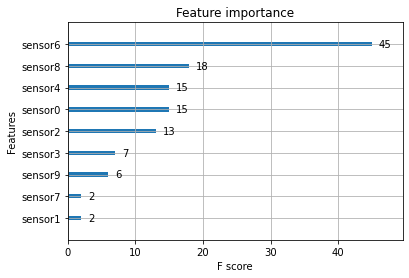

In [29]:
xgb = XGBClassifier(n_estimators = 100,
                           n_jobs = -1,
                           oob_score = True,
                           bootstrap = True, random_state=42)
xgb.fit(X, Y)
plot_importance(xgb)

From feature importance method of xgBoost we found that sensor 6 is the most important feature as compared to others.

## Permutation Feature Importance Method
There are some drawbacks in using scikit-learn feature importance method for a model trained on Random Forest
such as there is bias involved in this method. So to overcome this problem, permutation feature importance method is used where the model is trained using the Random Forest algorithm and validation score (Out of Bag score is calculated) which is denoted as a benchmarked score. After that, each column features are shuffled and pass to the model to calculate the validation score again. Afterward, the feature importance score is calculated by taking the difference between the score obtained from the shuffled data and benchmark score. This process is repeated for every feature column and the importance of the features is evaluated.

In [30]:
def model_metric(model, X, y):
    return accuracy_score(y, model.predict(X))

In [31]:
from rfpimp import *
imp_features = permutation_importances(model, X, Y, model_metric)
print(imp_features)
imp_features.reset_index(drop = False, inplace = True)

/home/sadique/anaconda3/envs/radar/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


         Importance
Feature            
sensor6      0.1275
sensor8      0.0125
sensor0      0.0050
sensor4      0.0050
sensor2      0.0025
sensor1      0.0000
sensor3      0.0000
sensor5      0.0000
sensor7      0.0000
sensor9      0.0000


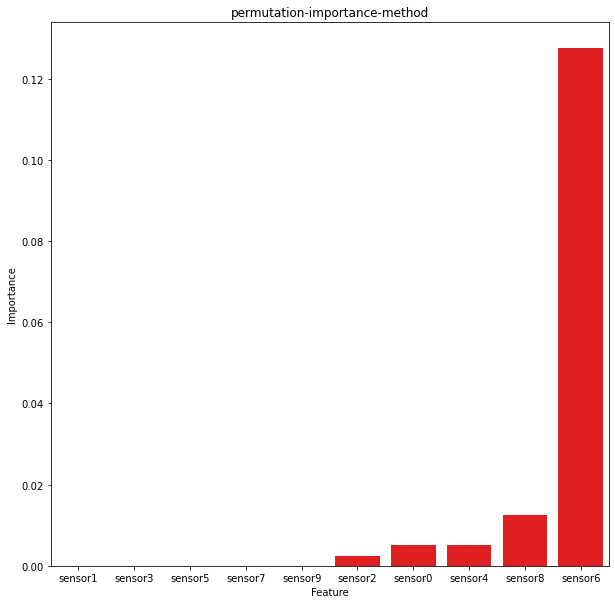

In [32]:
plot_important_features(imp_features,'permutation-importance-method')

As expected the permutation importance feature method gives a different result when compared to the Scikit learn's default feature importance method. Senor 6 is the best performing feature as compared to others. The ranking of features is almost similar to the important features obtained from the Xgboost method.  Sensor 8 and Sensor 4 are also important features as they are among the top three features.

## References

1. A guide for feature engineering and feature selection, with implementations and examples in python.terence parr, kerem turgutlu, christopher csiszar, and jeremy howard. https://explained.ai/rf-importance/
2.  A guide for feature engineering and feature selection, with implementations and examples in python. 
https://github.com/Yimeng-Zhang/feature-engineering-and-feature-selection
3. Hands-on with feature selection techniques: An introduction.
https://heartbeat.fritz.ai/
4. Machine learning basics - gradient boosting xgboost.https://www.shirin-glander.de/2018/11/ml_basics_